# 2D Computer Vision: Übung 1
## Team: Ahmed Adnan, Nicolas Huhle, Eugen Erb

In [6]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2

#### Read the images using scikit-image

In [7]:
bild01 = imread("bild01.jpg")
bild02 = imread("bild02.jpg")
bild03 = imread("bild03.jpg")
bild04 = imread("bild04.jpg")
bild05 = imread("bild05.jpg")
hidden = imread("hidden.png")
monkey = imread("monkey.jpg")
sea_wall = imread("sea_wall.jpg")
wood = imread("wood.jpg")

#### display the images

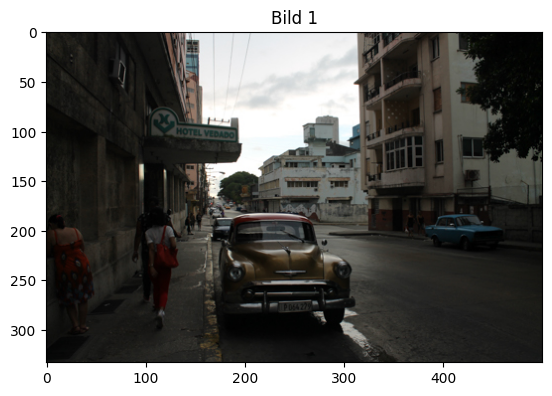

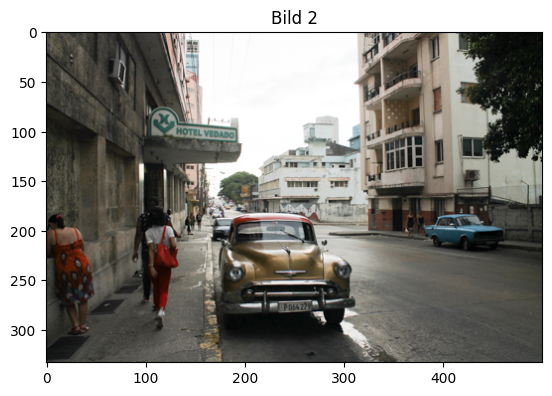

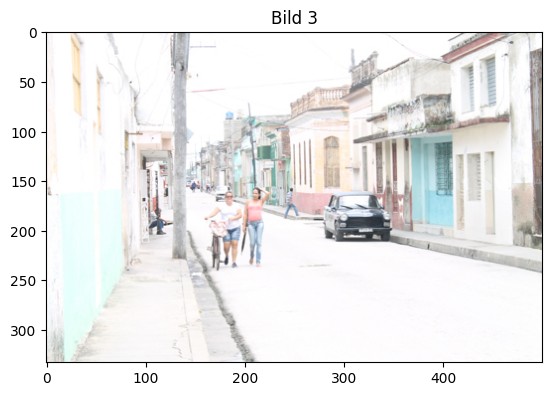

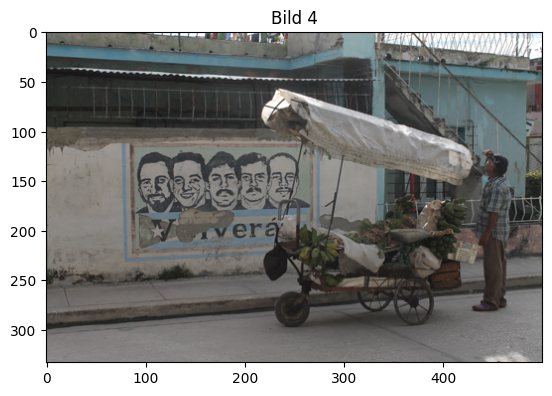

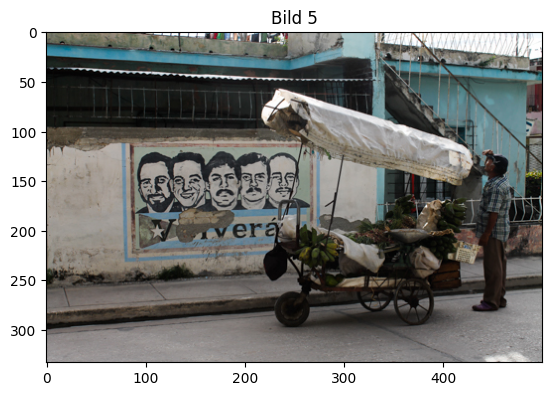

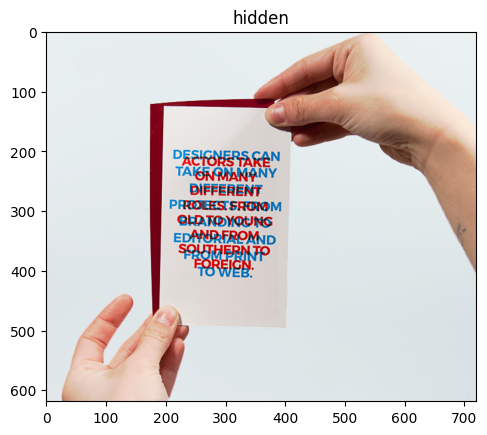

In [8]:
plt.imshow(bild01)
plt.title("Bild 1")
plt.show()

plt.imshow(bild02)
plt.title("Bild 2")
plt.show()

plt.imshow(bild03)
plt.title("Bild 3")
plt.show()

plt.imshow(bild04)
plt.title("Bild 4")
plt.show()

plt.imshow(bild05)
plt.title("Bild 5")
plt.show()

plt.imshow(hidden)
plt.title("hidden")
plt.show()

#### Image data type and more info about the image

In [9]:
print(type(bild01))
print("Image shape:", bild01.shape)
print("Data type of pixels:", bild01.dtype)


<class 'numpy.ndarray'>
Image shape: (333, 500, 3)
Data type of pixels: uint8


#### explanation
(height, width, 3) -> RGB <br>
(height, width) -> grayscale <br>
uint8: pixel values between 0–255 (8-bit images)

#### look up actual pixel values:

In [10]:
print("Pixel at (3,0):", bild01[3, 0])


Pixel at (3,0): [33 33 25]


##### We can also check what the specific pixel values of a region are

In [11]:
print("Top-left 5x5 region of image:")
print(bild01[:5, :5])

Top-left 5x5 region of image:
[[[34 29 25]
  [28 28 20]
  [25 24 20]
  [24 23 19]
  [35 36 30]]

 [[33 30 25]
  [24 25 17]
  [22 23 18]
  [23 23 21]
  [34 35 29]]

 [[33 30 25]
  [26 26 18]
  [23 22 18]
  [21 20 16]
  [31 30 26]]

 [[33 33 25]
  [30 30 22]
  [24 23 18]
  [24 22 23]
  [35 34 29]]

 [[32 33 25]
  [32 34 23]
  [25 26 21]
  [20 21 16]
  [32 32 30]]]


### seperating channels:
image[:, :, 0] is the Red channel

image[:, :, 1] is the Green channel

image[:, :, 2] is the Blue channel <br> <br>
first we extract the individual channels and the we can display the channels in grayscale images, white means 255 (color is saturated) black means this channel is not active in the area

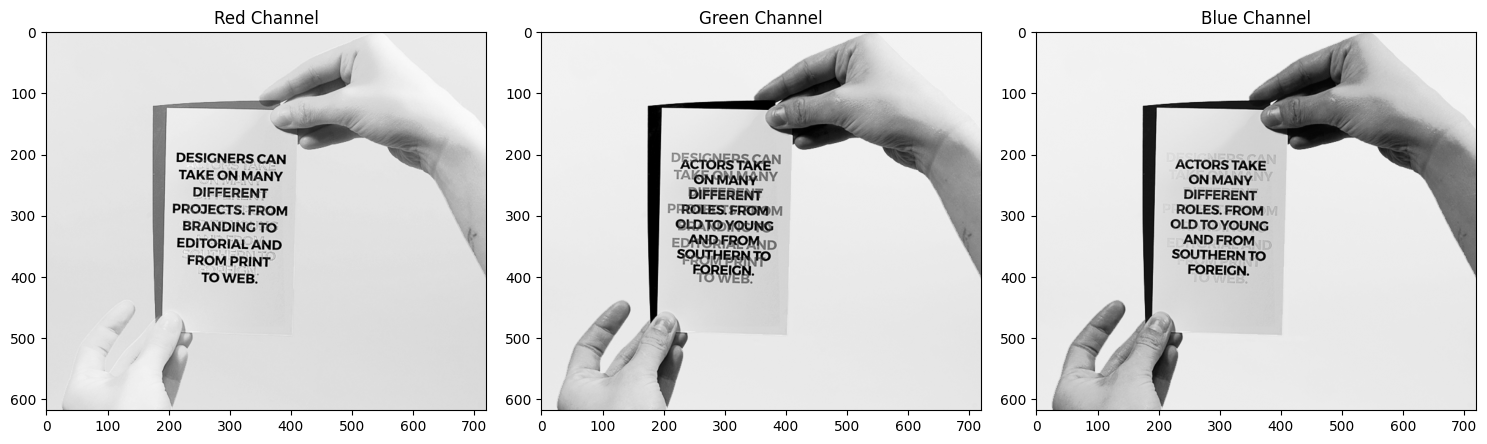

In [12]:
red_channel = hidden[:, :, 0]
green_channel = hidden[:, :, 1]
blue_channel = hidden[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(red_channel, cmap='gray')
axes[0].set_title("Red Channel")

axes[1].imshow(green_channel, cmap='gray')
axes[1].set_title("Green Channel")

axes[2].imshow(blue_channel, cmap='gray')
axes[2].set_title("Blue Channel")

plt.tight_layout()
plt.show()

#### just for fun (not part of the assignment)
display the channels in their own color:

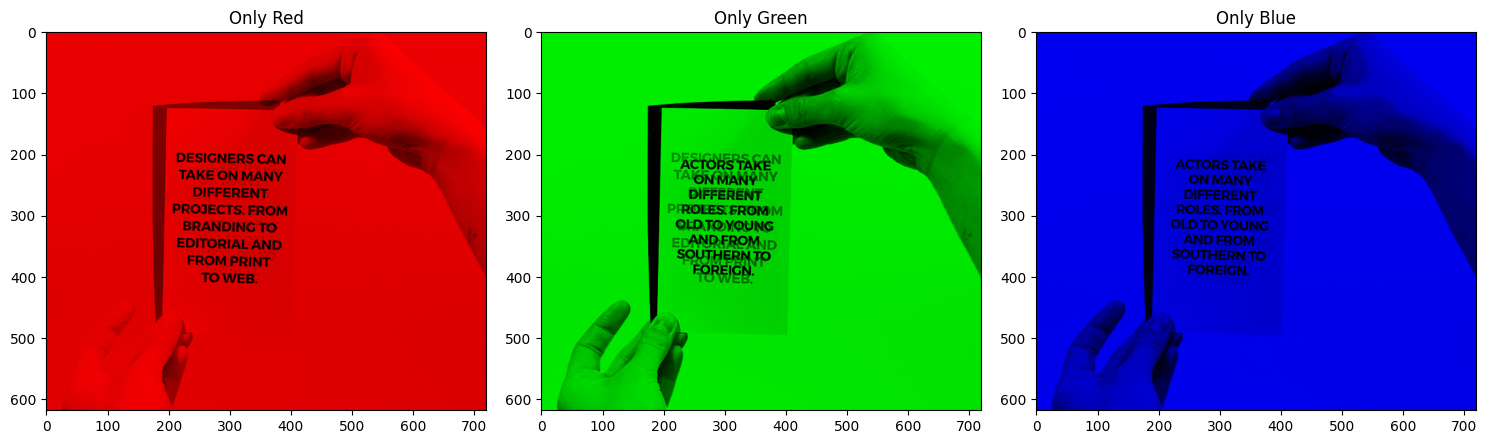

In [13]:
zeros = np.zeros_like(red_channel)
red_channel2 = hidden[:, :, 0]
green_channel2 = hidden[:, :, 1]
blue_channel2 = hidden[:, :, 2]

# Stack them into colored versions
only_red = np.stack([red_channel2, zeros, zeros], axis=2)
only_green = np.stack([zeros, green_channel2, zeros], axis=2)
only_blue = np.stack([zeros, zeros, blue_channel2], axis=2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(only_red.astype(np.uint8))
axes[0].set_title("Only Red")

axes[1].imshow(only_green.astype(np.uint8))
axes[1].set_title("Only Green")

axes[2].imshow(only_blue.astype(np.uint8))
axes[2].set_title("Only Blue")

plt.tight_layout()
plt.show()

#### Flip images
Horizontal Flip: Reverse the columns (left ↔ right)

Vertical Flip: Reverse the rows (top ↔ bottom)

In [14]:
def mirror_image(img, direction='horizontal'):
    """
    Mirrors the given image horizontally or vertically.
    
    Parameters:
        img (numpy array): The input RGB image.
        direction (str): 'horizontal' or 'vertical'
        
    Returns:
        A new mirrored image (numpy array)
    """
    # Get the image dimensions
    height, width, channels = img.shape
    
    # Create a new empty array of the same shape
    mirrored = np.zeros_like(img)
    
    # Loop through each pixel and place it in the mirrored position
    for y in range(height):
        for x in range(width):
            if direction == 'horizontal':
                mirrored[y, x] = img[y, width - 1 - x]  # Flip columns
            elif direction == 'vertical':
                mirrored[y, x] = img[height - 1 - y, x]  # Flip rows
            else:
                raise ValueError("Direction must be 'horizontal' or 'vertical'")
    
    return mirrored

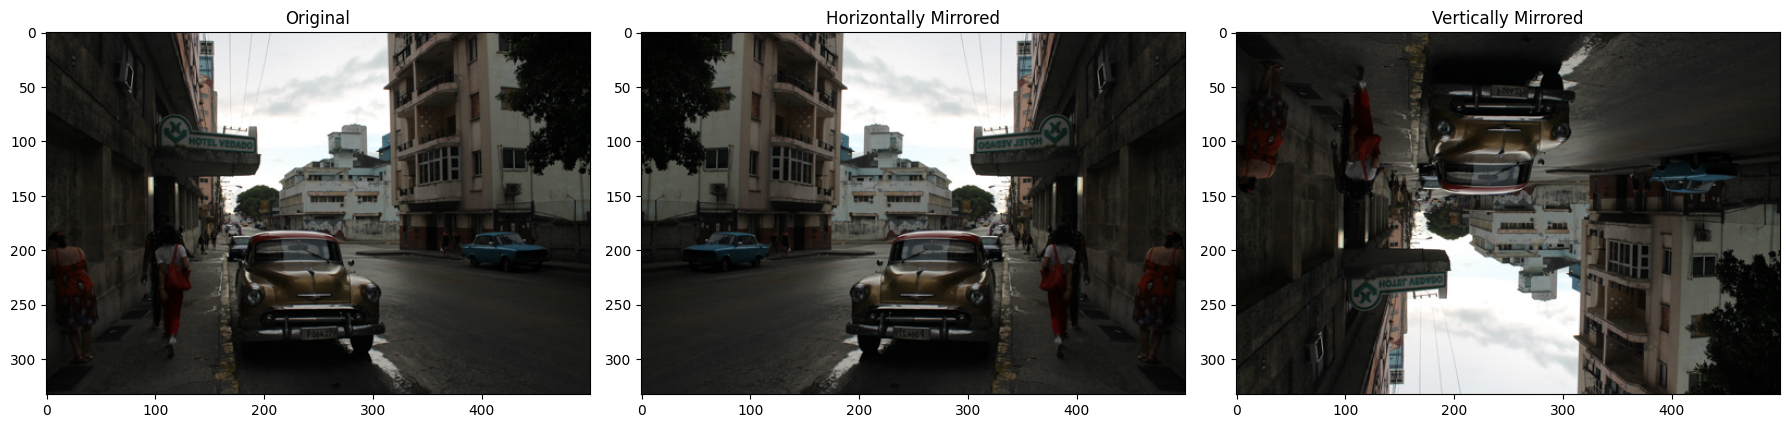

In [15]:
# Mirror the image horizontally
mirrored_h = mirror_image(bild01, direction='horizontal')

# Mirror the image vertically
mirrored_v = mirror_image(bild01, direction='vertical')

# Show original and mirrored images side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(bild01)
axes[0].set_title("Original")

axes[1].imshow(mirrored_h)
axes[1].set_title("Horizontally Mirrored")

axes[2].imshow(mirrored_v)
axes[2].set_title("Vertically Mirrored")

plt.tight_layout()
plt.show()


## Part 2: Histogramme, Binning und Lookup-Tabellen

#### Histogramm of 8-bit Grayscale image:

Takes an RGB image as input, converts it to grayscale, computes a histogram of pixel intensities from 0 to 255

Returns a NumPy array of length 256 (each index counts how often that intensity occurred)

In [16]:
def computeHisto(image):
    """
    Converts an RGB image to grayscale and computes a histogram 
    with 256 intensity levels (0-255).
    
    Parameters:
        image (numpy array): RGB image
        
    Returns:
        histo (numpy array): Array of length 256 with frequency counts
    """
    
    height, width, _ = image.shape
    
    # create an empty histogram with 256 bins
    histo = np.zeros(256, dtype=int)
    
    # loop through each pixel and compute grayscale value
    for y in range(height):
        for x in range(width):
            r, g, b = image[y, x]
            
            # compute grayscale using luminance formula
            gray = int(0.2126 * r + 0.7152 * g + 0.0722 * b)
            
            # ensure it's in [0, 255] (clip)
            gray = min(max(gray, 0), 255)
            
            # increment the corresponding bin
            histo[gray] += 1
            
    return histo

this one below is for grayscale images (will be used at the last part of the assignment)

In [17]:
def computeHistoGray(image):
    """
    Assumes image is already in grayscale.
    """
    height, width = image.shape  # Works for 2D grayscale images
    
    histo = np.zeros(256, dtype=int)
    
    for y in range(height):
        for x in range(width):
            intensity = image[y, x]
            histo[intensity] += 1
    
    return histo


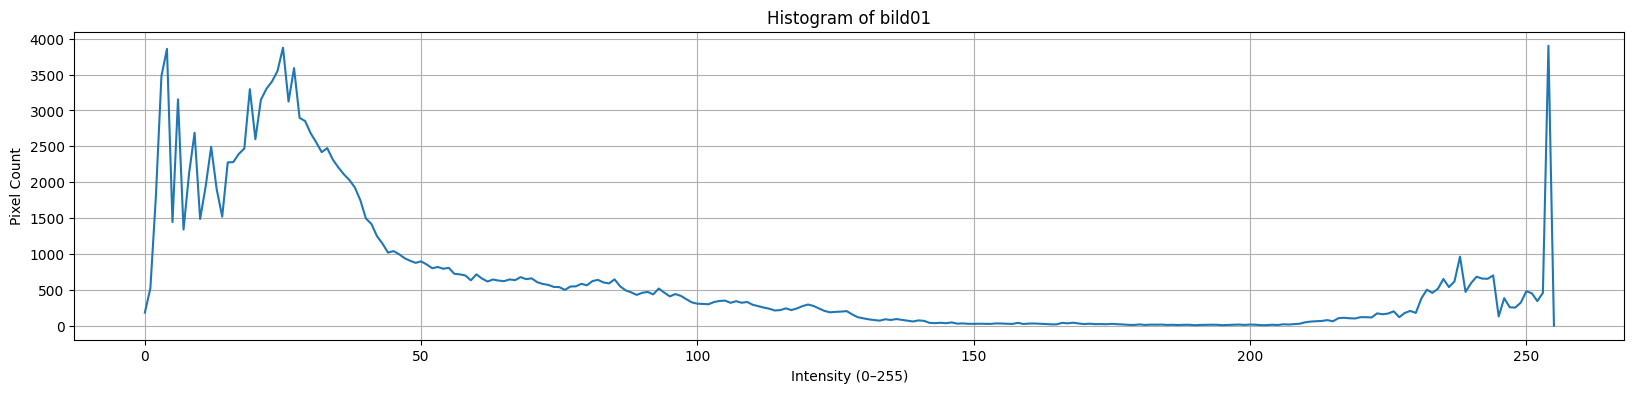

In [18]:
# bild01
histo01 = computeHisto(bild01)

# plot it using matplotlib
plt.figure(figsize=(20, 4))
plt.plot(histo01)
plt.title("Histogram of bild01")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()


#### Interpretation:
The image is underexposed (too dark) <br>
High peaks at very low intensities (0–50) → The image has many dark pixels <br>
a lot of shadows or poor lighting (miidle high range)<br> 
The brightness is not well balanced

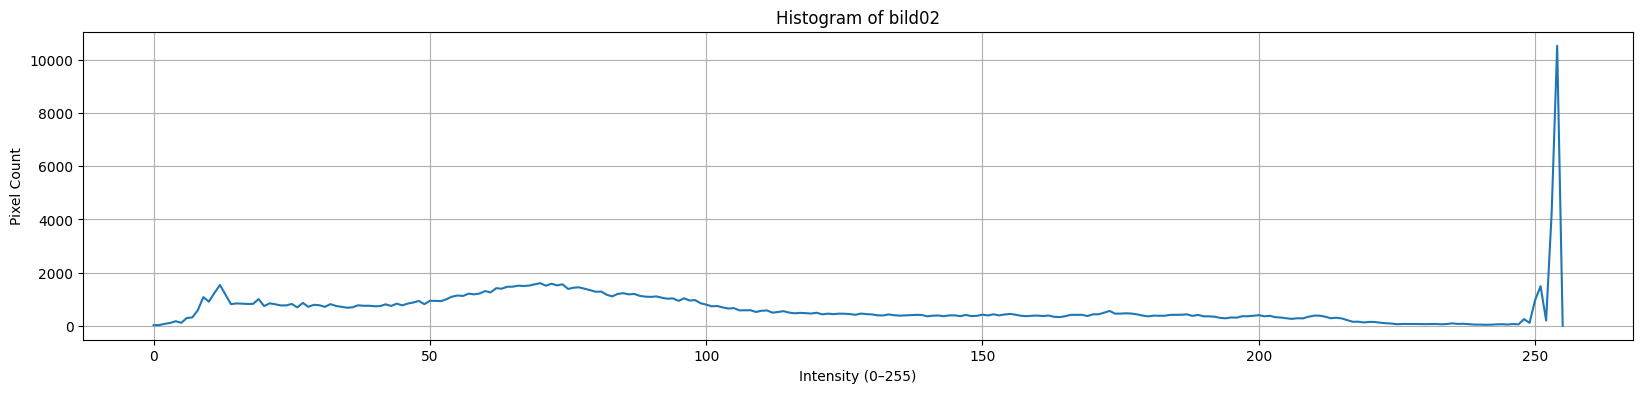

In [19]:
# bild02
histo02 = computeHisto(bild02)

plt.figure(figsize=(20, 4))
plt.plot(histo02)
plt.title("Histogram of bild02")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()


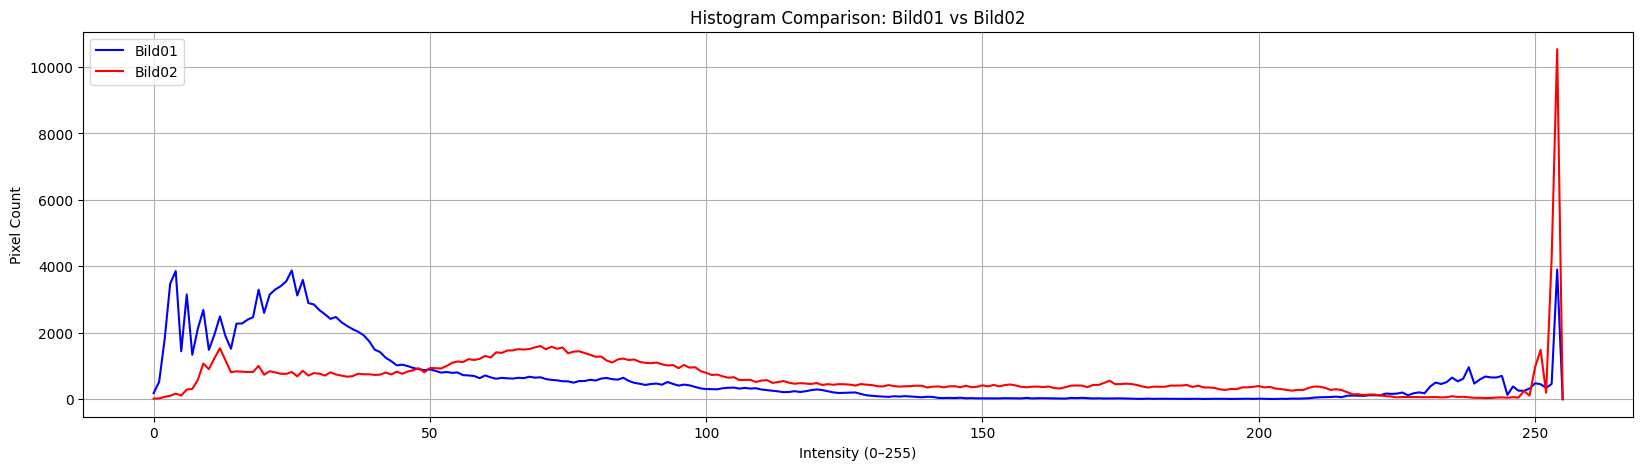

In [31]:
# Compute histograms
histo01 = computeHisto(bild01)
histo02 = computeHisto(bild02)

# Plot both histograms in the same plot
plt.figure(figsize=(20, 5))
plt.plot(histo01, color='blue', label='Bild01')
plt.plot(histo02, color='red', label='Bild02')
plt.title("Histogram Comparison: Bild01 vs Bild02")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.legend()
plt.grid(True)
plt.show()


#### Interpertation:
Histogram is shifted toward the right compared to bild1 (higher intensities) <br>
Huge peak near 255 → Many pixels are very bright, almost white <br>
Still some detail in darker areas, but not much.

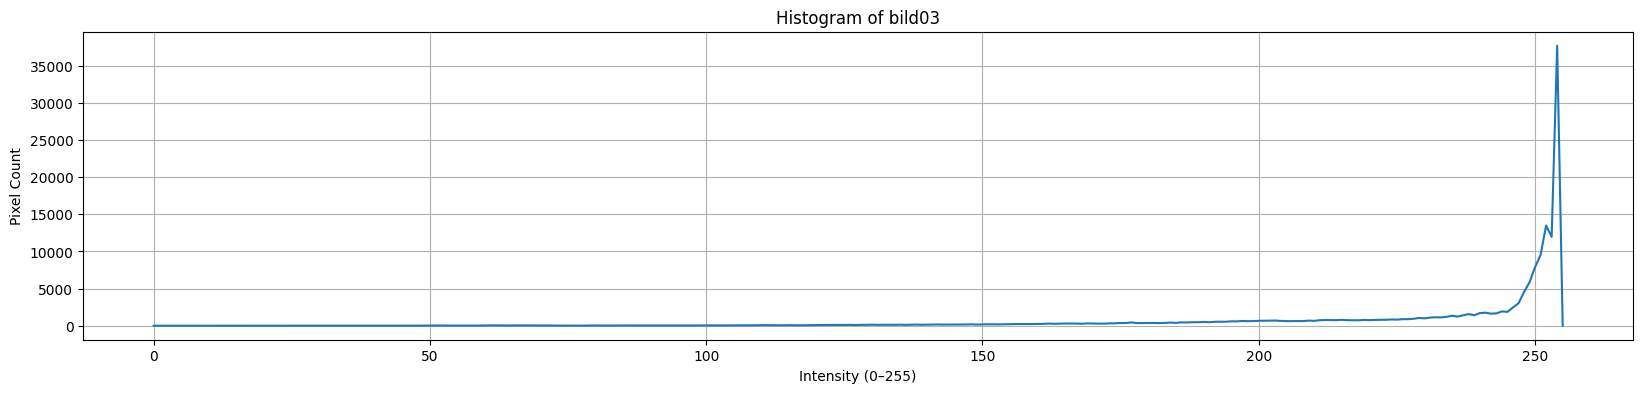

In [20]:

# bild03
histo03 = computeHisto(bild03)

plt.figure(figsize=(20, 4))
plt.plot(histo03)
plt.title("Histogram of bild03")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()


#### Interpertation
A massive spike at intensity 255

The rest of the histogram is nearly flat and close to zero

A tiny number of pixels across the lower/mid brightness range (but really minimal)<br>
<b>Severe over exposed image<b>


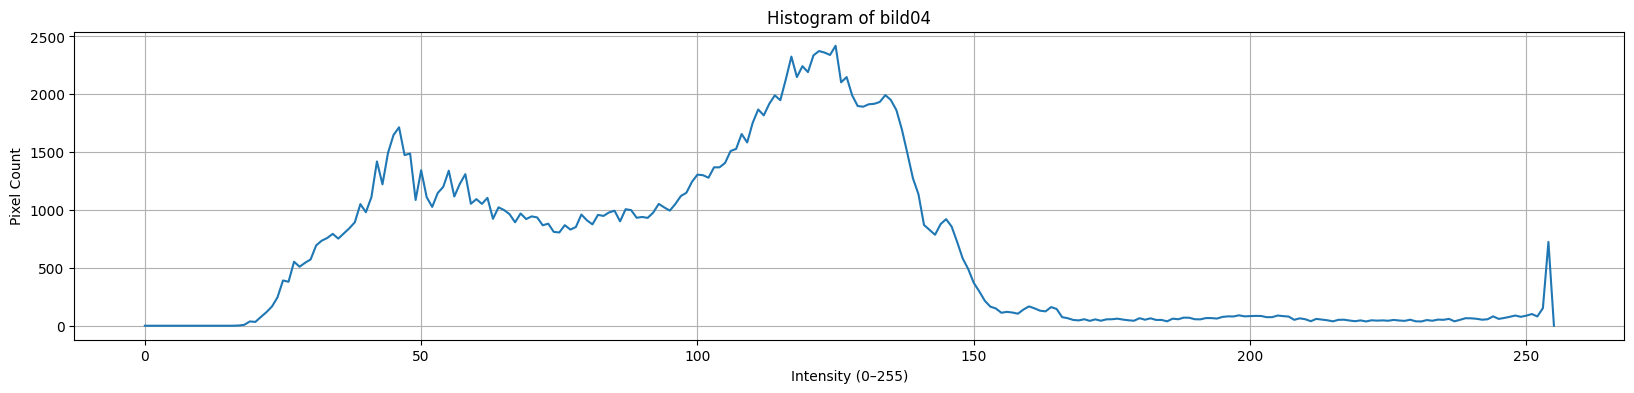

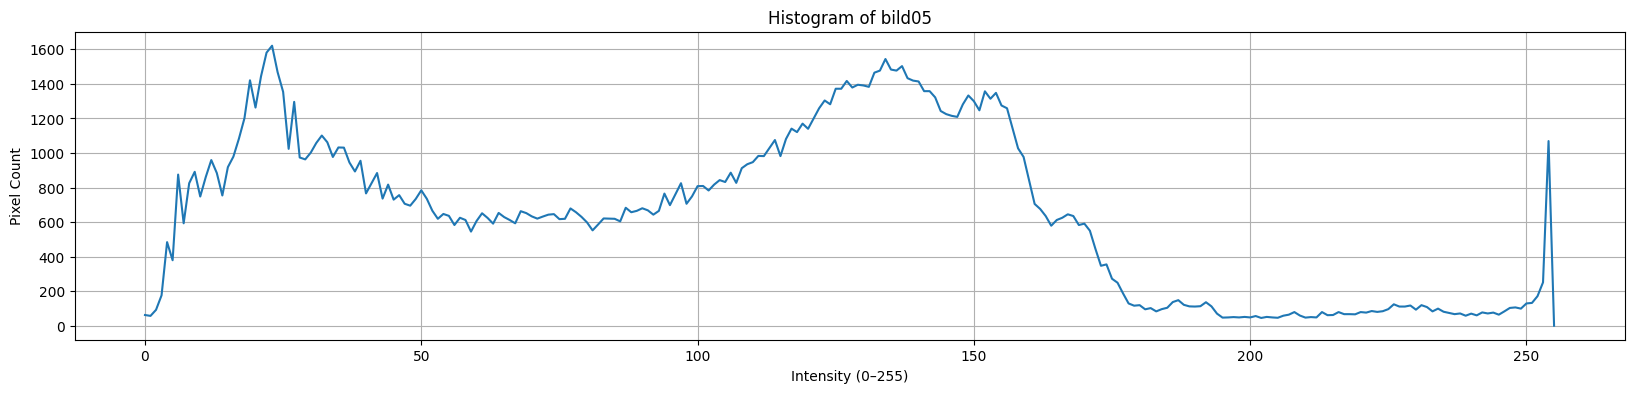

In [21]:

# bild04
histo04 = computeHisto(bild04)

plt.figure(figsize=(20, 4))
plt.plot(histo04)
plt.title("Histogram of bild04")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()


# bild05
histo05 = computeHisto(bild05)

plt.figure(figsize=(20, 4))
plt.plot(histo05)
plt.title("Histogram of bild05")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()


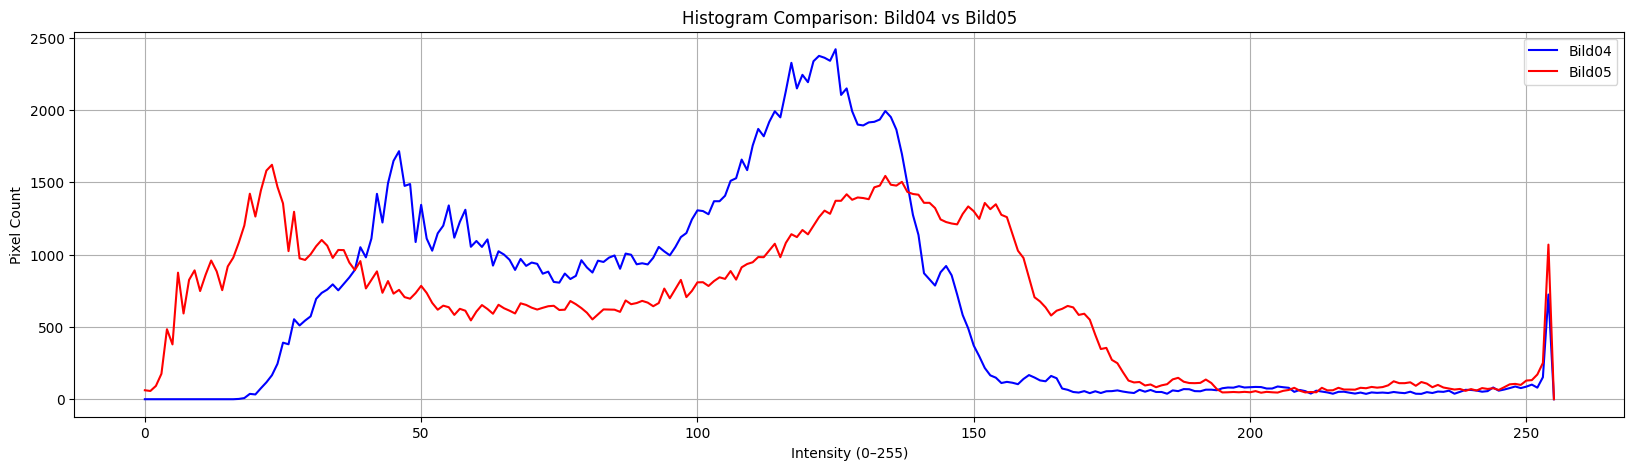

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(histo04, color='blue', label='Bild04')
plt.plot(histo05, color='red', label='Bild05')
plt.title("Histogram Comparison: Bild04 vs Bild05")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.legend()
plt.grid(True)
plt.show()


#### bild04 (original):
Histogram is concentrated between intensity ~30 to ~150

Clear peaks in the midtone range

Almost no pixels at very dark (0) or very bright (255) levels

Indicates low contrast — the image likely looks a bit "flat" or grayish 

#### bild05 (edited):
Histogram is more spread out across the full range (from near 0 to 255)

Darker values (left side) are more populated

Brights are also stretched, with more data reaching higher intensities

The curve is more balanced and wider

#### conclusion: contrast has been changed.

This stretching increases the separation between dark and bright regions, making the image look more vivid and improving its visual contrast.

### LUT

To avoid data loss when brightening an image, a simple addition of a constant value should not be used. Instead, a lookup table or a non-linear transformation such as gamma correction can be applied. This allows dark areas of the image to be brightened more strongly while preserving the bright areas. In this way, overexposure and loss of information can be prevented.

#### 1 crate a LUT for bright and dark areas
dark pixels -> brighter <br>
bright pixels -> change a little to keep highlights

In [22]:
def lookup_table(gamma, K=256):
    """
    Generates a gamma correction lookup table.
    """
    aMax = K - 1
    lut = np.zeros(K, dtype=np.uint8)
    
    for a in range(K):
        aa = a / aMax  # normalize to [0,1]
        bb = np.power(aa, gamma)  # apply gamma correction
        b = np.round(bb * aMax).astype(np.uint8)  # scale back to [0,255]
        lut[a] = b
    
    return lut


In [23]:
def apply_lut_color(image, lut):
    """
    Applies LUT to each channel of a color image (RGB).
    """
    # Split channels
    b, g, r = cv2.split(image)
    b = cv2.LUT(b, lut)
    g = cv2.LUT(g, lut)
    r = cv2.LUT(r, lut)
    # Merge back
    brightened = cv2.merge((b, g, r))
    return brightened


#### notes about gamma LUT:
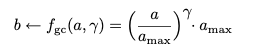 <br>
alpha: input value from 0–255 (original pixel intensity)<br>
γ < 1 (e.g. 0.6): brightens the image <br>
γ > 1: darkens the image <br>
b: output

In [24]:
gamma = 0.6

lut = lookup_table(gamma)

# apply to image
image_original = bild01
brightened_image = apply_lut_color(image_original, lut)

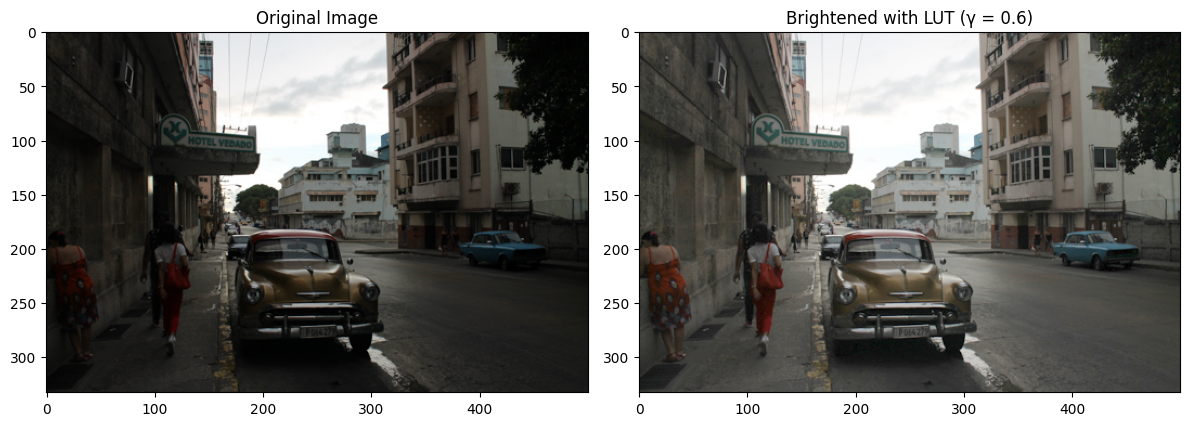

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_original)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(brightened_image)
plt.title("Brightened with LUT (γ = 0.6)")

plt.tight_layout()
plt.show()

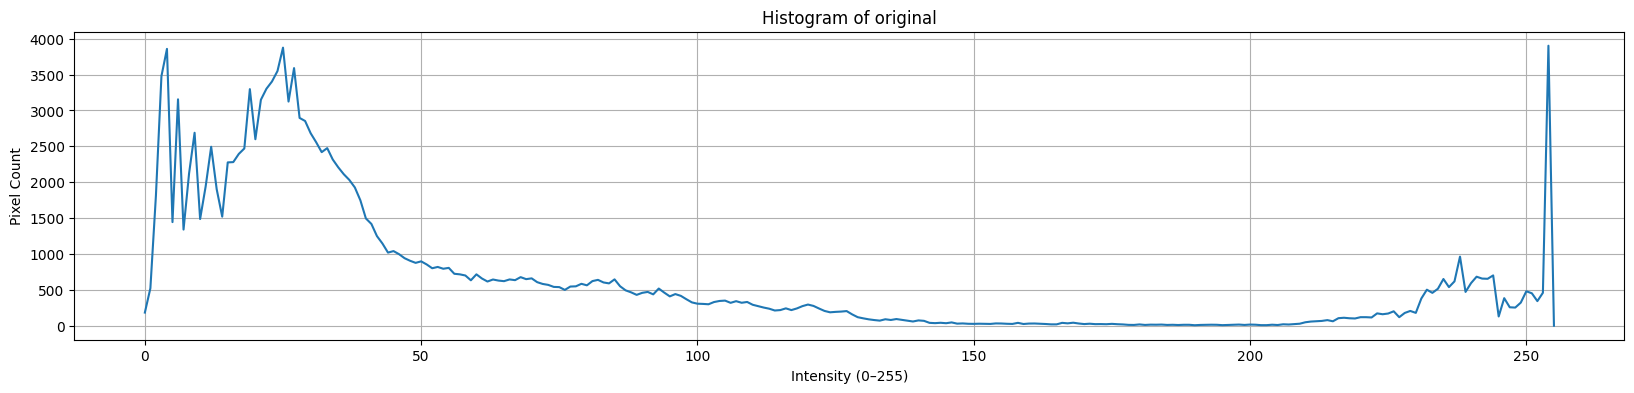

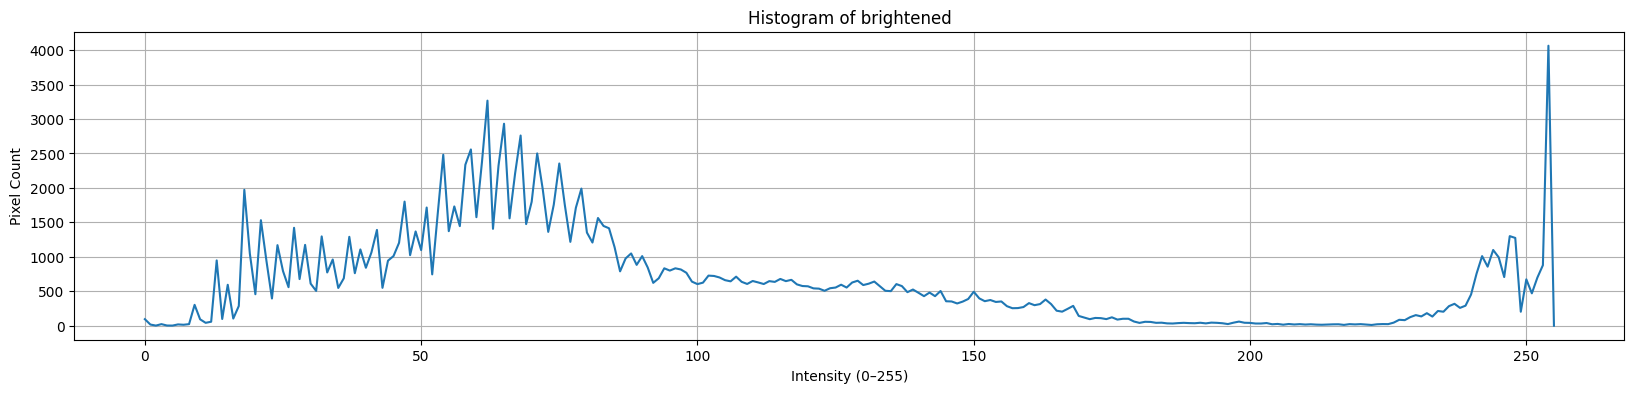

In [26]:
histo06 = computeHisto(image_original)

# Plot it using matplotlib
plt.figure(figsize=(20, 4))
plt.plot(histo06)
plt.title("Histogram of original")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()

histo07 = computeHisto(brightened_image)

# Plot it using matplotlib
plt.figure(figsize=(20, 4))
plt.plot(histo07)
plt.title("Histogram of brightened")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()

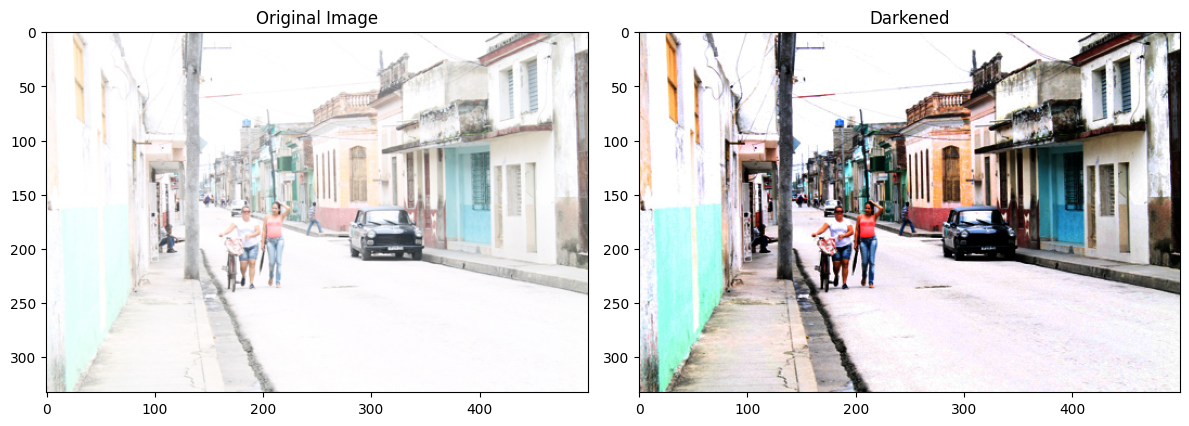

In [27]:
gamma = 5

lut = lookup_table(gamma)

# apply to image
image_original = bild03
darkend_image = apply_lut_color(image_original, lut)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_original)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(darkend_image)
plt.title("Darkened")

plt.tight_layout()
plt.show()

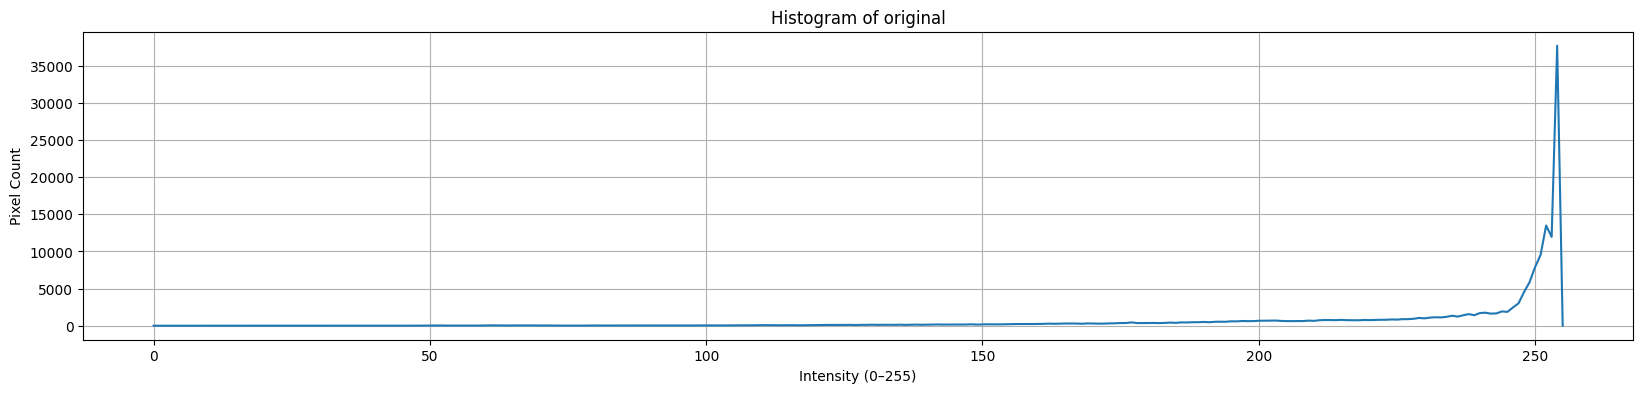

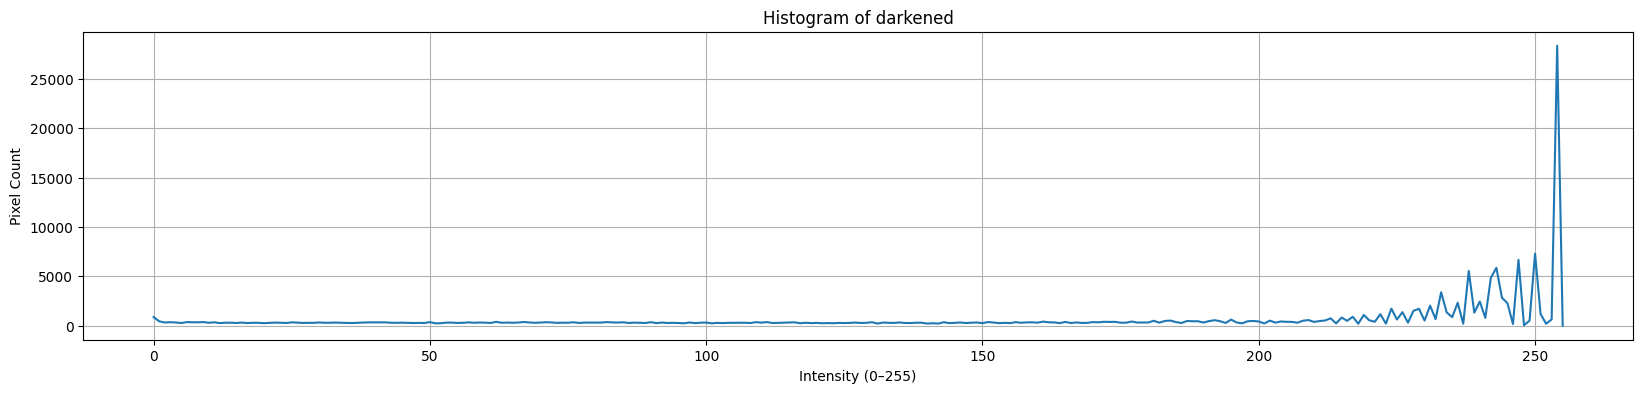

In [28]:
histo06 = computeHisto(image_original)

# Plot it using matplotlib
plt.figure(figsize=(20, 4))
plt.plot(histo06)
plt.title("Histogram of original")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()

histo07 = computeHisto(darkend_image)

# Plot it using matplotlib
plt.figure(figsize=(20, 4))
plt.plot(histo07)
plt.title("Histogram of darkened")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()